In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import ResNet101V2, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [27]:
# Set up the training, validation, and testing data directories
train_dir = r"C:\Users\hp\Desktop\ResNet 101\train"
val_dir = r"C:\Users\hp\Desktop\ResNet 101\val"
test_dir = r"C:\Users\hp\Desktop\ResNet 101\test"

In [29]:
# Define the input image size
img_size = 224

# Define the number of classes
num_classes = 10

In [30]:
# Set up data augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

In [31]:
# Set up the data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

Found 499 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [32]:
# Load the ResNet101 model and remove the top layers
base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

In [33]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [34]:
# Add new layers for classification
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

In [35]:
# Create the model
model = Model(inputs=base_model.input, outputs=x)

In [36]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.n // val_generator.batch_size)

Epoch 1/10
 6/15 [===========>..................] - ETA: 24s - loss: 3.1632 - accuracy: 0.4693

C:\Users\hp\.conda\envs\python\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - 60s 3s/step - loss: 1.9299 - accuracy: 0.6510 - val_loss: 0.5074 - val_accuracy: 0.8854
Epoch 2/10
15/15 [==============================] - 51s 3s/step - loss: 0.3666 - accuracy: 0.9101 - val_loss: 0.2171 - val_accuracy: 0.9375
Epoch 3/10
15/15 [==============================] - 50s 3s/step - loss: 0.3327 - accuracy: 0.9208 - val_loss: 0.0835 - val_accuracy: 0.9792
Epoch 4/10
15/15 [==============================] - 48s 3s/step - loss: 0.2511 - accuracy: 0.9443 - val_loss: 0.0508 - val_accuracy: 0.9792
Epoch 5/10
15/15 [==============================] - 49s 3s/step - loss: 0.1356 - accuracy: 0.9679 - val_loss: 0.0168 - val_accuracy: 0.9896
Epoch 6/10
15/15 [==============================] - 49s 3s/step - loss: 0.1188 - accuracy: 0.9764 - val_loss: 8.8765e-04 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 49s 3s/step - loss: 0.0747 - accuracy: 0.9722 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 8/10
15/15 [=========

In [38]:
# Evaluate the model on the testing set
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

Found 107 images belonging to 10 classes.


In [39]:
test_loss, test_acc = model.evaluate(test_generator)

4/4 [==============================] - 8s 2s/step - loss: 0.5156 - accuracy: 0.8879


In [40]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8878504633903503


In [98]:
# model.save(r"C:\Users\hp\Desktop\ResNet 101")

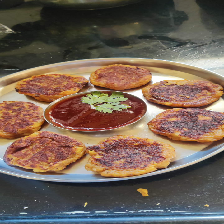

In [41]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\aloo_tikki 1.jpeg", target_size=(224, 224))
img

In [42]:
import numpy as np

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [43]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 2s 2s/step


In [44]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: aloo_tikki


## Checking on baati

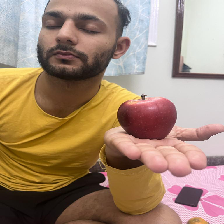

In [61]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\apple.jpeg", target_size=(224, 224))
img

In [62]:
import numpy as np

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [63]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 0s 121ms/step


In [64]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: burger


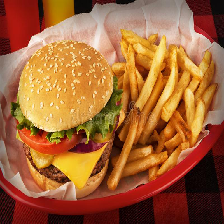

In [65]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\burger.jpeg", target_size=(224, 224))
img

In [66]:
import numpy as np

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [67]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 0s 120ms/step


In [68]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: burger


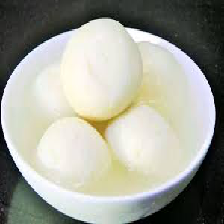

In [69]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\rg.jpeg", target_size=(224, 224))
img

In [70]:
import numpy as np

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [71]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 0s 120ms/step


In [72]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: rasgulla


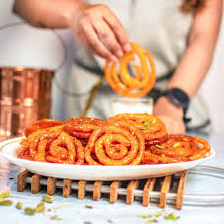

In [73]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\jalebi.jpeg", target_size=(224, 224))
img

In [74]:
import numpy as np

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [75]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 0s 126ms/step


In [76]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: jalebi


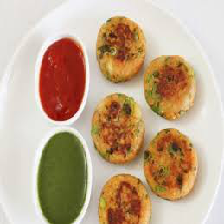

In [77]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\tikki.jpeg", target_size=(224, 224))
img

In [78]:
import numpy as np

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [79]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 0s 123ms/step


In [80]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: aloo_tikki


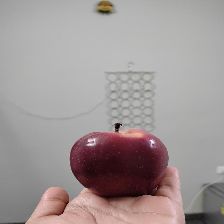

In [81]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\apple.jpeg", target_size=(224, 224))
img

In [82]:
import numpy as np

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [83]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 0s 122ms/step


In [84]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: apple


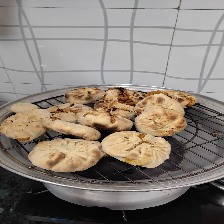

In [94]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\baati 1.jpeg", target_size=(224, 224))
img

In [95]:
import numpy as np

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [96]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 0s 123ms/step


In [97]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: aloo_tikki
